<a href="https://colab.research.google.com/github/ElahehJafarigol/DeepLearning.AI-TensorFlow-Developer-Professional-Certificate/blob/main/RadioML_2016_10A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic Modulation Classification

**MaxWav LLc**

Spring 2024

In this notebook we will explore some deep learning models to classify data based on their modulation type.

**Dataset:** RadioML 2026.10A

**Contributors:** Elaheh Jafarigol, Saeid Hosseinipour

**Reference paper:** ?

**External code resources:**



###Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split

from keras import models, layers, metrics
from keras.models import Sequential
from keras.layers import Input, Reshape, Dense, Flatten , Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from keras.layers import GaussianNoise

from keras.optimizers import SGD, Adam


np.random.seed(42)

###Utility Functions

In [ ]:
def load_dataset(path):
    with open(path, "rb") as f: # Open the file in binary read mode
        data_dict = pickle.load(f, encoding="bytes")

        if data_dict is None:
            raise ValueError("Loading data failed.")
            return

        print("Number of samples:", len(data_dict))
        column_names = list(data_dict.keys())

        # Sample data type of first column, first sample
        first_sample = data_dict[column_names[0]][0]

        # Print the data type of the first sample
        print("Data type of the first sample:", type(first_sample))

        return data_dict

path = "/content/drive/MyDrive/Colab Notebooks/DeepSig/RML2016.10a_dict.pkl"
data = load_dataset(path)

Number of samples: 220
Data type of the first sample: <class 'numpy.ndarray'>


In [ ]:
def print_data_shape(data, mod, snr):
    """
    Prints the shape of the data for a given modulation and SNR.

    Args:
        data: A dictionary containing the data.
        mod: The modulation type.
        snr: The signal-to-noise ratio.
    """
    print(f'Modulation type: {mod}, SNR: {snr}, Sample: {data[(mod, snr)].shape[0]}, Shape {data[(mod, snr)].shape}')

def explore_data(data_dict):

    # Check if the data is loaded
    if dict is None:
        raise ValueError("Load the data first suing load_data()")

    for key in sorted(data_dict.keys()):
        try:
            print_data_shape(data_dict, key[0], key[1])
        except KeyError:
            print(f"Key: {key}, Error: Key does not exist")
    """
    The letter b before b'mod' indicates that the string is a byte string.
    """
    return

explore_data(data)

Modulation type: b'8PSK', SNR: -20, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: -18, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: -16, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: -14, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: -12, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: -10, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: -8, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: -6, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: -4, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: -2, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: 0, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: 2, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: 4, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b'8PSK', SNR: 6, Sample: 1000, Shape (1000, 2, 128)
Modulation type: b

In [ ]:
mod_list = set()
for mod, key in data.keys():
    mod_list.add(mod)
print ("Number of classes:", len(mod_list))

Number of classes: 11


### Data Preprocessing

#### Features and Lables

In [ ]:
def data_preprocess(data_dict):
    """
    Saves the data is feature and label lists
    """
    feature = []
    label = []

    for key in sorted(data_dict.keys()):
        feature.append(data[(key[0], key[1])])
        for i in range(data[key[0], key[1]].shape[0]):
            label.append((key[0], key[1]))
    feature = np.vstack(feature)

    return feature, label

X, y = data_preprocess(data)

**Question: What other preprocessing steps do we want to include?**

#### Train/Test Split
**Question**

How do we want to split the data?

How about time series methods?

In [ ]:
def data_split(X_data, y_data):
    """
    Split plit to train/test samples
    """
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    print('Number of training examples: ',len(X_train))
    print('Number of testing examples: ',len(X_test))
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = data_split(X, y)

Number of training examples:  176000
Number of testing examples:  44000


**Task**
1. reshape the data

In [ ]:
print(X_train.shape)
print(X_train.shape[1:])


(176000, 2, 128)
(2, 128)


### Build the Model

**Question**

What type of model and architecture do we want to use?

Are we doing a single-phase classification or two-phase?

What are the important metrics?

In [ ]:
def build_model (shape, classes):
    model = tf.keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=shape),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
        layers.Dense(11, activation = 'softmax'),
    ])
    return model

CNN_model = build_model(shape = [1, 2, 128], classes = 11)
CNN_model.summary()

###Parameter Tuning

In [ ]:
# Learning rate

###Training

In [ ]:
def train_function (train_data, test_data, model):

    return "training Complete"

###Prediction

In [ ]:
def prediction_function():

    return "Good job!"

###Plot the Results

In [ ]:
# Accuracy and Loss

###Data Exploration: Visualization

In [ ]:
def plot_constellation(dataset, mod, snr, num128pts=1, offset=0, scale=False):
    modtype = dataset[(mod, snr)]
    points_i = []
    points_q = []
    points = [points_i, points_q]
    for i in range(num128pts):
        for j in range(128):
            points[0].append(modtype[i + offset][0][j])
            points[1].append(modtype[i + offset][1][j])

    marksz = max(0.01, 3/num128pts)
    plt.plot(points[0], points[1], '.', markersize=marksz)
    plt.title(str(mod)[1:] + str(snr))
    plt.tight_layout()
    if (scale):
          plt.xlim(-0.02, 0.02)
          plt.ylim(-0.02, 0.02)
          plt.gca().set_aspect('equal', adjustable='box')
    return points

all samples dumped together - 128k points


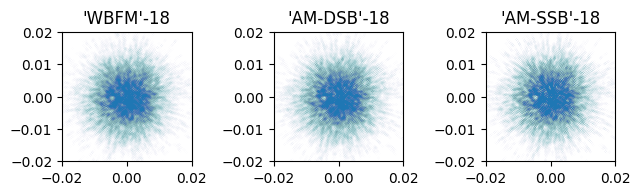

In [ ]:
_snr = -18
print('all samples dumped together - 128k points')
plt.figure(2)
plt.subplot(1, 3, 1)
plot_constellation(data, b'WBFM', _snr, num128pts=1000, scale=True, offset=0)
plt.subplot(1, 3, 2)
plot_constellation(data, b'AM-DSB', _snr, num128pts=1000, scale=True, offset=0)
plt.subplot(1, 3, 3)
plot_constellation(data, b'AM-SSB', _snr, num128pts=1000, scale=True, offset=0)
plt.show()